In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import probplot
from scipy.stats import anderson, shapiro

In [2]:
mu, sigma = 0.5, 0.1
distributions = [
    np.random.normal(mu, sigma, 1000),
    np.random.normal(10*mu, sigma, 1000),
    np.random.normal(10*mu, 100*sigma, 1000),
    np.random.normal(mu, 100*sigma, 1000),    
]


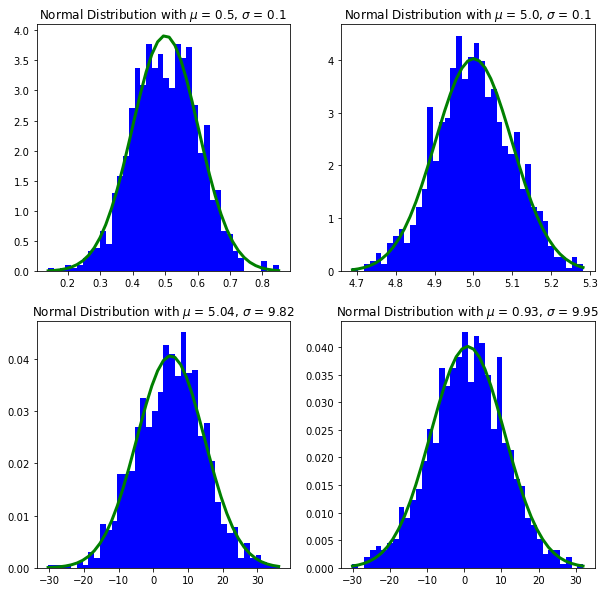

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for num, data in enumerate(distributions):
    count, bins, ignored = axes[num//2, num%2].hist(data, bins=40, density=True, color='b')
    mu, sigma = data.mean(), data.std()
    stat = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2))
    #stat = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(bins-mu)**2/(2*sigma**2))
    axes[num//2, num%2].plot(bins, stat, linewidth=3, color='g')
    axes[num//2, num%2].set_title(
        f"Normal Distribution with $\mu$ = {round(mu, 2)}, $\sigma$ = {round(sigma, 2)}")

## Проверка нормальности распределения

In [4]:
norm_data = np.random.randn(1000)
another_data = np.random.randint(0, 100, size=1000)

(array([38., 43., 40., 42., 34., 61., 51., 40., 38., 41., 43., 43., 29.,
        45., 50., 42., 29., 37., 29., 29., 34., 47., 39., 33., 43.]),
 array([ 0.  ,  3.96,  7.92, 11.88, 15.84, 19.8 , 23.76, 27.72, 31.68,
        35.64, 39.6 , 43.56, 47.52, 51.48, 55.44, 59.4 , 63.36, 67.32,
        71.28, 75.24, 79.2 , 83.16, 87.12, 91.08, 95.04, 99.  ]),
 <BarContainer object of 25 artists>)

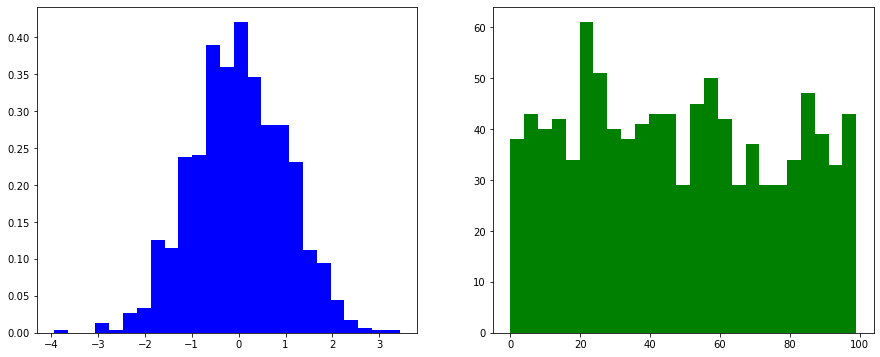

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
count, bins, ig = axes[0].hist(norm_data, bins=25, density=True, color='b')
axes[1].hist(another_data, bins=25,  color='g')

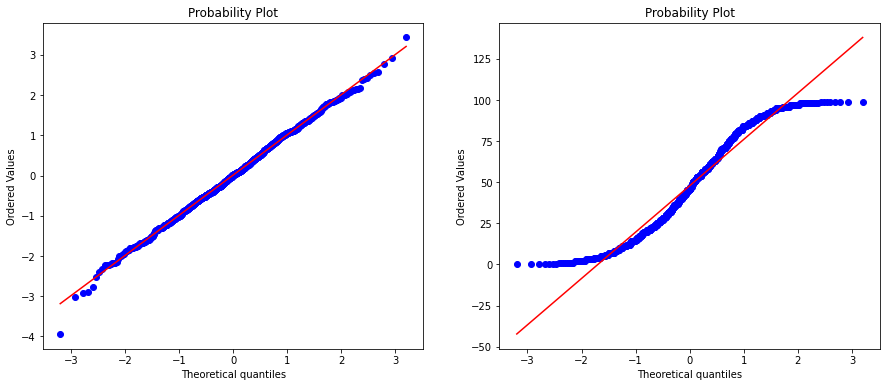

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
probplot(x=norm_data, plot=axes[0])
probplot(x=another_data, plot=axes[1])
plt.show()

In [7]:
norm_data_1 = np.random.randn(100)
stat, p_value = shapiro(x=norm_data)
print(f'Value statistic = {round(stat, 2)}, p_value = {round(p_value, 2)}')

Value statistic = 1.0, p_value = 0.69


In [8]:
stat, p_value = shapiro(x=another_data)
print(f'Value statistic = {round(stat, 2)}, p_value = {round(p_value, 5)}')

Value statistic = 0.95, p_value = 0.0


In [11]:
mu_0 = 525
x_mean = 541.4
n = 100
sigma = 100

stat = np.sqrt(n) * (x_mean - mu_0)/sigma
p_value = st.norm.pdf(stat)

print(f'p_value = {round(p_value, 4)}')

p_value = 0.104


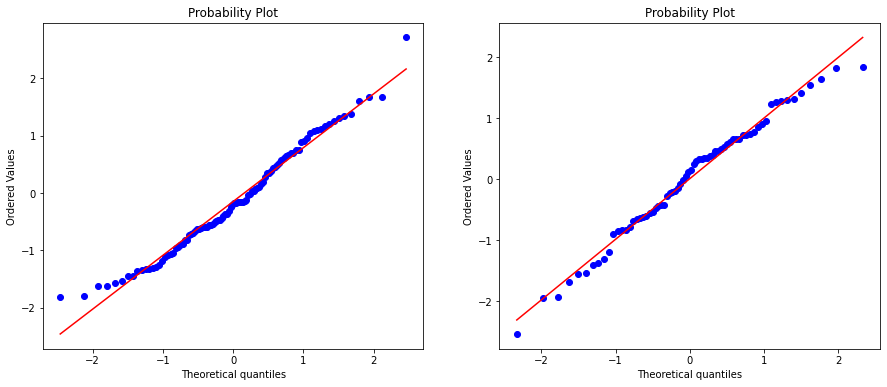

In [12]:
x_1 = np.random.randn(100)
x_2 = np.random.randn(70)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

probplot(x=x_1, plot=axes[0])
probplot(x=x_2, plot=axes[1])

plt.show()

In [13]:
x1_mean, x2_mean = np.mean(x_1), np.mean(x_2)
x1_std, x2_std = np.std(x_1), np.std(x_2)

stat = (x1_mean - x2_mean)/np.sqrt(x1_std**2/len(x_1) + x2_std**2/len(x_2))
p_value = st.norm.pdf(stat)

print(f'p_value = {round(p_value, 6)}')

p_value = 0.225545


In [14]:
x1_mean, x2_mean

(-0.14800904488011146, 0.010918226801791489)

(array([ 1.,  3.,  5.,  5., 12.,  8., 14., 12.,  5.,  5.]),
 array([-2.53423897, -2.09602265, -1.65780634, -1.21959002, -0.7813737 ,
        -0.34315739,  0.09505893,  0.53327525,  0.97149157,  1.40970788,
         1.8479242 ]),
 <BarContainer object of 10 artists>)

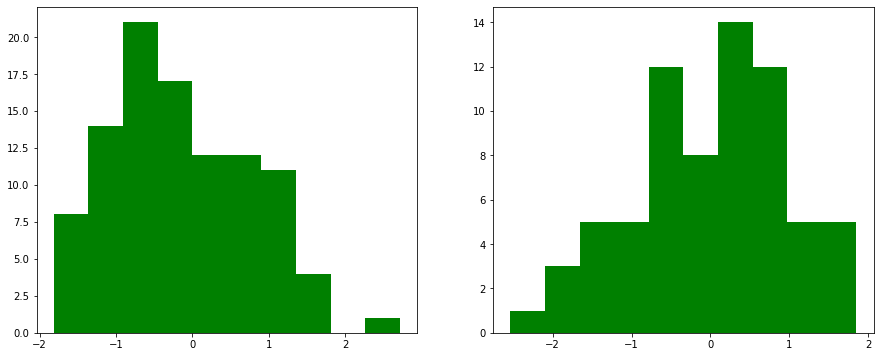

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].hist(x_1, bins=10,  color='g')
axes[1].hist(x_2, bins=10,  color='g')

In [16]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def two_sampled_independent_samples(stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - st.norm.cdf(np.abs(stat)))
    
    if alternative == 'less':
        return st.norm.cdf(stat)

    if alternative == 'greater':
        return 1 - st.norm.cdf(stat)

In [18]:
x_1 = np.random.randint(0, 2, size=100)
x_2 = np.random.randint(0, 2, size=100)

stat = proportions_diff_z_stat_ind(x_1, x_2)
p_value = two_sampled_independent_samples(stat)
print(f"p_value = {round(p_value, 4)}")

p_value = 0.479


In [19]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [20]:
x_1 = np.random.randint(0, 2, size=100)
x_2 = np.random.randint(0, 2, size=100)

In [21]:
stat = proportions_diff_z_stat_rel(x_1, x_2)
p_value = two_sampled_independent_samples(stat)

print(f"p_value = {round(p_value, 4)}")

p_value = 0.8886


In [22]:
np.mean(x_1), np.mean(x_2)

(0.5, 0.51)

In [58]:

for i in range(5):
    np.random.seed(11)
    print(np.random.randint(0, 10, size=10))

[9 0 1 7 1 7 2 8 0 0]
[9 0 1 7 1 7 2 8 0 0]
[9 0 1 7 1 7 2 8 0 0]
[9 0 1 7 1 7 2 8 0 0]
[9 0 1 7 1 7 2 8 0 0]
